# Diabetes case study 

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Getting the data

In [2]:
df = pd.read_csv("dia.csv")

# 1. Data exploration

In [3]:
df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

##### Age 1.20-65
##### Sex 1. Male, 2.Female
##### Polyuria 1.Yes, 2.No. It is excessive or an abnormally large production or passage of urine
##### Polydipsia 1.Yes, 2.No. It is excessive thirst or excess drinking.
##### sudden weight loss 1.Yes, 2.No.
##### weakness 1.Yes, 2.No.
##### Polyphagia 1.Yes, 2.No. It is an abnormally strong sensation of hunger or desire to eat often leading to or accompanied by overeating.
##### Genital thrush 1.Yes, 2.No. It is a common condition caused by a type of yeast called Candida. 
##### visual blurring 1.Yes, 2.No.
##### Itching 1.Yes, 2.No.
##### Irritability 1.Yes, 2.No.
##### delayed healing 1.Yes, 2.No.
#### partial paresis 1.Yes, 2.No.
#### muscle stiffness 1.Yes, 2.No.
#### Alopecia 1.Yes, 2.No.
#### Obesity 1.Yes, 2.No.
#### Class 1.Positive, 2.Negative.

In [4]:
df.shape

(520, 17)

In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
df.describe()

Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000

In [7]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

### In order to see how the others features influence, it is necesary to convert the string variables into continues variables. As all the categorical features are binary then we can convert into 0 and 1 values. 

In [8]:
df['class'].replace(to_replace=['Positive','Negative'], value=[1,0],inplace=True)
df['Polyuria'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Polydipsia'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['sudden weight loss'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['weakness'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Polyphagia'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Genital thrush'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['visual blurring'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Itching'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Irritability'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['delayed healing'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['partial paresis'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['muscle stiffness'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Alopecia'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df['Obesity'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)

df.head()


Age Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopecia  Obesity  class  
0                0                 1         1        1      1  
1                1                 0         1        0      1  
2                0                 1         1        0      1  
3                0                 0         0        0      1  
4                1                 1         1        1      1

### Let see if there is any correlation between the different columns

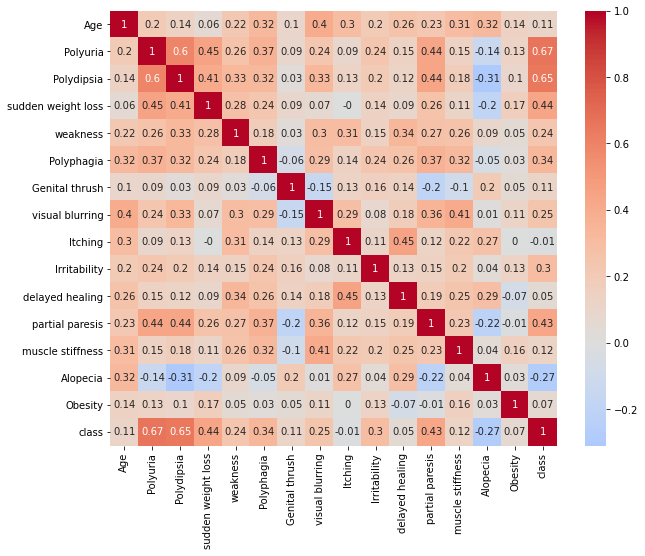

In [9]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

### Let's see how some features influence the diabetes risk

### But, first let's see the total diabetes rate

In [10]:
df['class'].sum() / df['class'].count()

0.6153846153846154

# Age

### We have only one numerical feature and the rest are categorical. Then, let's take a look at the distribution of the Age parameter

Text(0.5, 1.0, 'Age histogram')

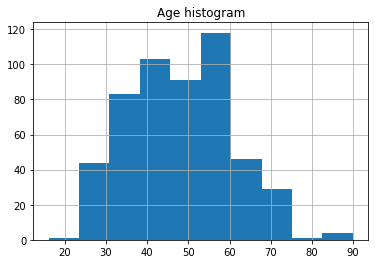

In [11]:
df['Age'].hist().set_title('Age histogram')

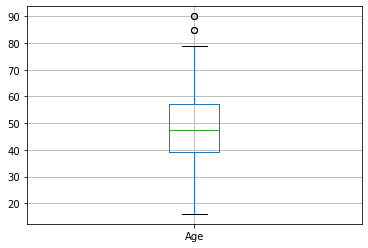

In [12]:
df.boxplot(column=['Age'])

In [13]:
df['Age'].mean()

48.02884615384615

##### Which is the mean age for each gender

In [14]:
df.groupby('Gender')['Age'].mean()

Gender
Female    47.031250
Male      48.612805
Name: Age, dtype: float64

### How does the age influenciate the diabetes rate

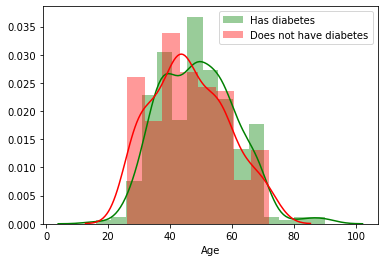

In [15]:
sns.distplot( df[df['class']==1]['Age'] , kde=True, label='Has diabetes', color='g')
sns.distplot( df[df['class']==0]['Age'] , kde=True, label='Does not have diabetes', color='r')

plt.legend(prop={'size': 10})

### Old people

##### Now let's count for people above 60 years, and see how this sickness affects

In [16]:
(df['Age'] > 60).sum()

80

##### How it is the rate of diabetes of older people

In [17]:
df_old = df[df['Age'] >= 60]
df_old['class'].sum() / len(df_old['class'])

0.6947368421052632

##### More than 50% of the old people seems to have diabetes

##### How the gender influenciate for old people

In [18]:
df_old.groupby('Gender')['class'].mean()

Gender
Female    0.965517
Male      0.575758
Name: class, dtype: float64

### Seems that women are more propense to get diabetes when they are old

### Young people

##### Now let's count for people under 20 years, and see how this sickness affects

In [19]:
(df['Age'] <= 20).sum()

1

### We don't have enough statistics to make this study

# Gender

Text(0.5, 1.0, 'Age histogram')

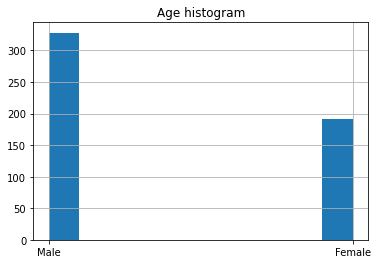

In [20]:
df['Gender'].hist().set_title('Age histogram')

### How does the sex influenciate the diabetes rate

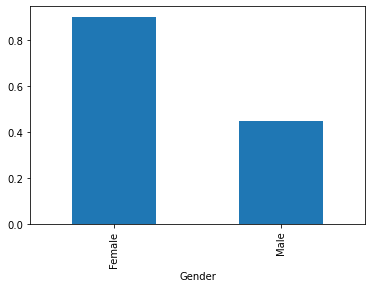

In [21]:
df.groupby('Gender')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

##### Seems that women have a higher tendency to have diabetes

### How the sex and the age influence in the diabetes rate?

In [22]:
df.pivot_table(index='Age', columns='Gender', values='class', aggfunc='mean')

Gender    Female      Male
Age                       
16           NaN  1.000000
25      1.000000  1.000000
26           NaN  0.000000
27           NaN  0.000000
28      0.833333  0.000000
29           NaN  0.000000
30      1.000000  0.052632
31      1.000000  1.000000
32      0.000000  0.750000
33      0.000000  1.000000
34      0.333333  0.000000
35      1.000000  0.666667
36      0.666667  0.200000
37           NaN  0.428571
38      1.000000  0.461538
39      1.000000  0.800000
40      1.000000  0.230769
41           NaN  1.000000
42           NaN  0.333333
43      1.000000  0.210526
44           NaN  0.285714
45      1.000000  0.200000
46      1.000000  0.000000
47      1.000000  0.312500
48      1.000000  1.000000
49      1.000000  0.833333
50      0.750000  0.500000
51      0.250000  1.000000
52           NaN  0.750000
53      1.000000  0.266667
54      1.000000  0.533333
55      0.933333  0.857143
56      1.000000  0.428571
57           NaN  0.600000
58      1.000000  0.500000
59      0.250000       NaN
60      1.000000  0.500000
61      1.000000  0.750000
62      1.000000  1.000000
63           NaN  1.000000
64           NaN  0.200000
65      0.750000  0.000000
66      1.000000  0.875000
67           NaN  0.375000
68      1.000000  0.666667
69      1.000000       NaN
70           NaN  0.600000
72           NaN  0.222222
79           NaN  1.000000
85           NaN  1.000000
90      1.000000       NaN

Text(0, 0.5, 'Diabetes ratio')

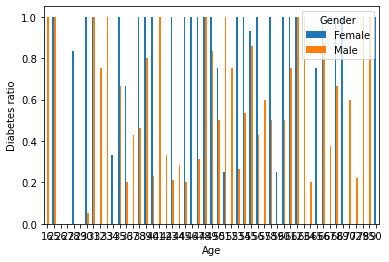

In [23]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Age', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Polyuria

Text(0.5, 1.0, 'Polyuria histogram')

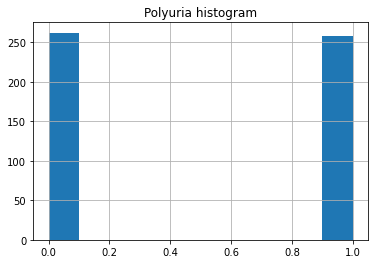

In [24]:
df['Polyuria'].hist().set_title('Polyuria histogram')

### How does Polyuria influenciate the diabetes

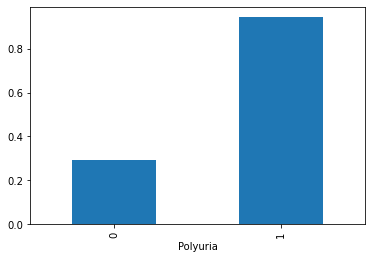

In [25]:
df.groupby('Polyuria')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Polyuria influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

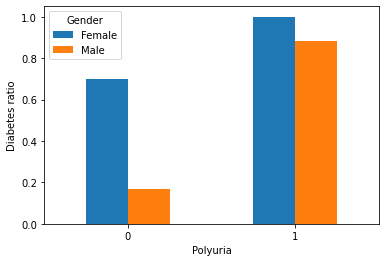

In [26]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Polyuria', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Polydipsia

Text(0.5, 1.0, 'Polydipsia histogram')

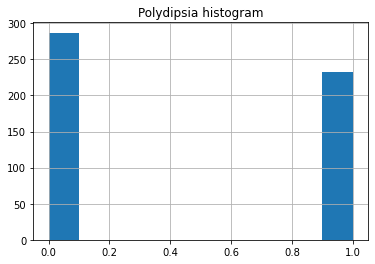

In [27]:
df['Polydipsia'].hist().set_title('Polydipsia histogram')

### How does Polydipsia influenciate the diabetes

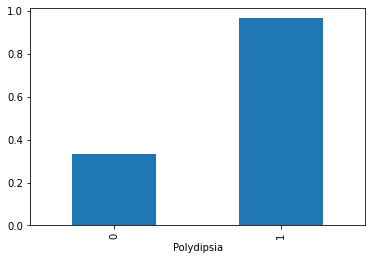

In [28]:
df.groupby('Polydipsia')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Polydipsia influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

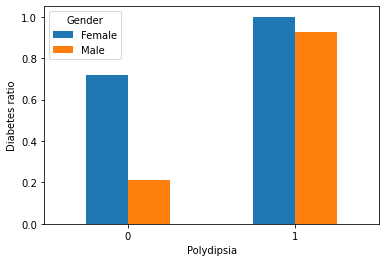

In [29]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Polydipsia', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### Acording to the table of correlation the features of Polyuria y Polydipsia are high related

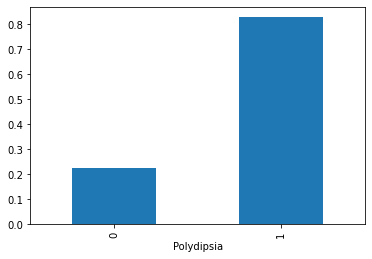

In [30]:
df.groupby('Polydipsia')['Polyuria'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

# Sudden weight loss

Text(0.5, 1.0, 'sudden weight loss histogram')

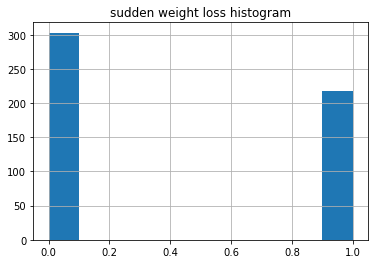

In [31]:
df['sudden weight loss'].hist().set_title('sudden weight loss histogram')

### How does sudden weight loss influenciate the diabetes

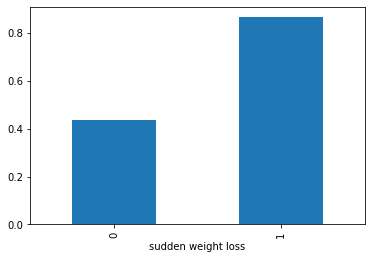

In [32]:
df.groupby('sudden weight loss')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the sudden weight loss influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

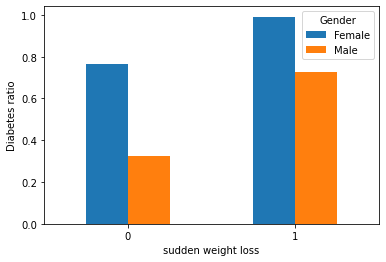

In [33]:
fig, ax1 = plt.subplots()
df.pivot_table(index='sudden weight loss', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

#  Weakness

Text(0.5, 1.0, 'weakness histogram')

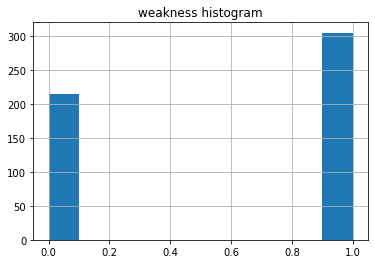

In [34]:
df['weakness'].hist().set_title('weakness histogram')

### How does weakness influenciate the diabetes

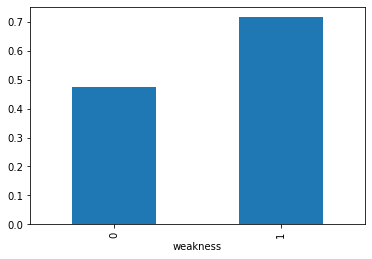

In [35]:
df.groupby('weakness')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the weakness influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

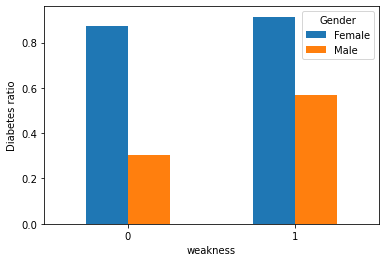

In [36]:
fig, ax1 = plt.subplots()
df.pivot_table(index='weakness', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Polyphagia

Text(0.5, 1.0, 'Polyphagia histogram')

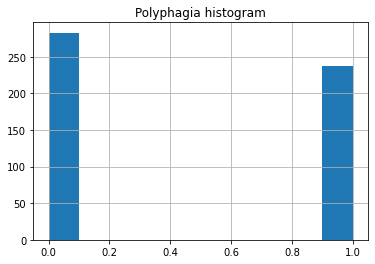

In [37]:
df['Polyphagia'].hist().set_title('Polyphagia histogram')

### How does Polyphagia influenciate the diabetes

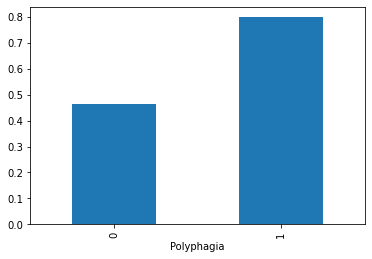

In [38]:
df.groupby('Polyphagia')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Polyphagia influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

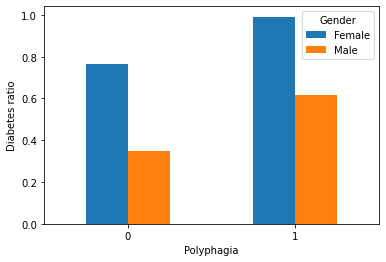

In [39]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Polyphagia', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

#  Genital thrush

Text(0.5, 1.0, 'Genital thrush histogram')

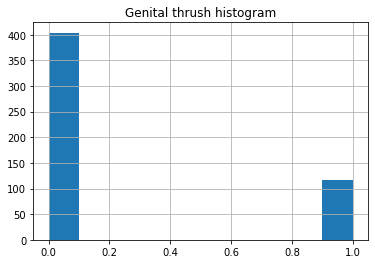

In [40]:
df['Genital thrush'].hist().set_title('Genital thrush histogram')

### How does Genital thrush influenciate the diabetes

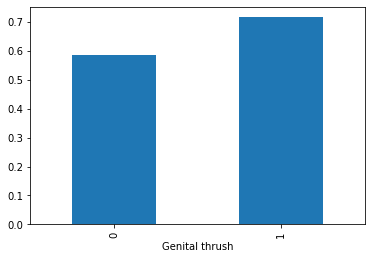

In [41]:
df.groupby('Genital thrush')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Genital thrush influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

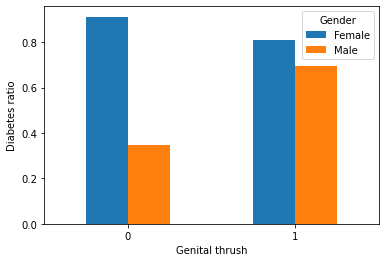

In [42]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Genital thrush', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Visual blurring

Text(0.5, 1.0, 'visual blurring histogram')

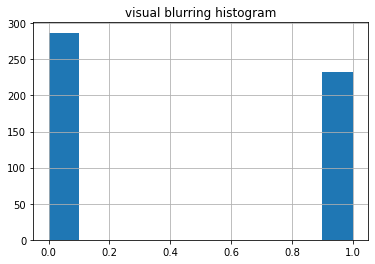

In [43]:
df['visual blurring'].hist().set_title('visual blurring histogram')

### How does visual blurring influenciate the diabetes

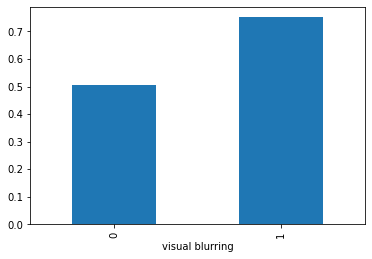

In [44]:
df.groupby('visual blurring')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the visual blurring influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

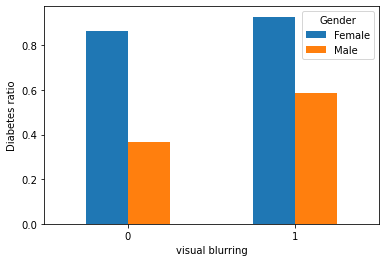

In [45]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='visual blurring', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Itching

Text(0.5, 1.0, 'Itching histogram')

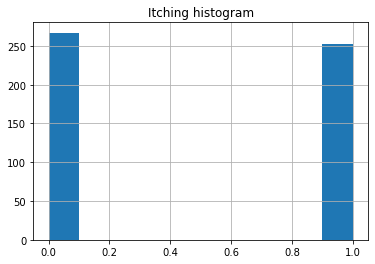

In [46]:
df['Itching'].hist().set_title('Itching histogram')

### How does Itching influenciate the diabetes

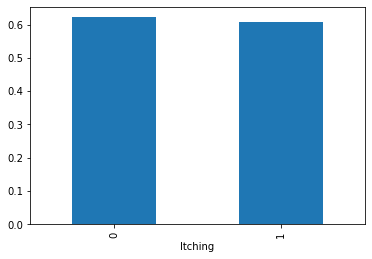

In [47]:
df.groupby('Itching')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Itching influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

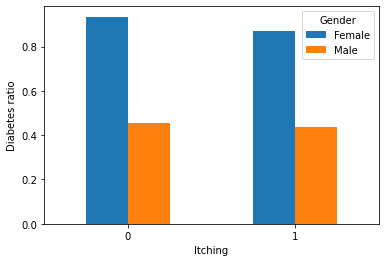

In [48]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Itching', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### This particular feature seems to don't influence the diabetes rate

In [49]:
df.drop(columns=['Itching'], inplace= True)

# Irritability

Text(0.5, 1.0, 'Irritability histogram')

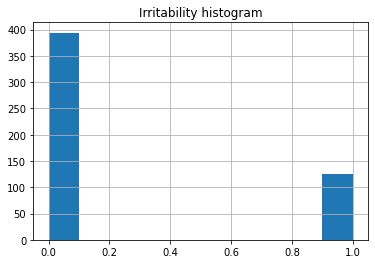

In [50]:
df['Irritability'].hist().set_title('Irritability histogram')

### How does Irritability influenciate the diabetes

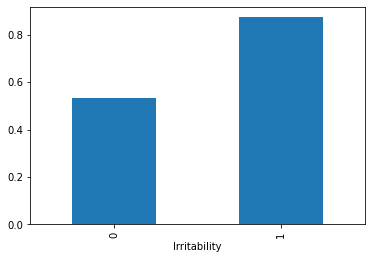

In [51]:
df.groupby('Irritability')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Irritability influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

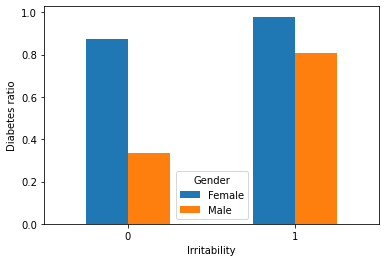

In [52]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Irritability', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Delayed healing

Text(0.5, 1.0, 'delayed healing histogram')

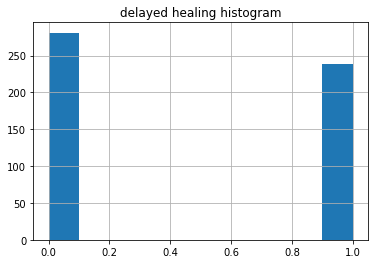

In [53]:
df['delayed healing'].hist().set_title('delayed healing histogram')

### How does delayed healing influenciate the diabetes

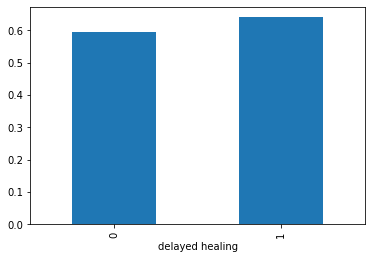

In [54]:
df.groupby('delayed healing')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the delayed healing influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

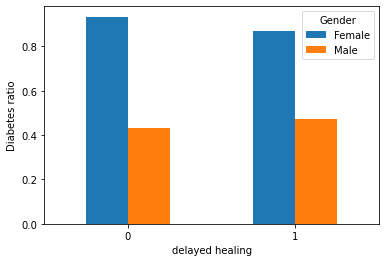

In [55]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='delayed healing', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

### This particular feature seems to don't influence the diabetes rate

In [56]:
df.drop(columns=['delayed healing'], inplace= True)

# Partial paresis

Text(0.5, 1.0, 'partial paresis histogram')

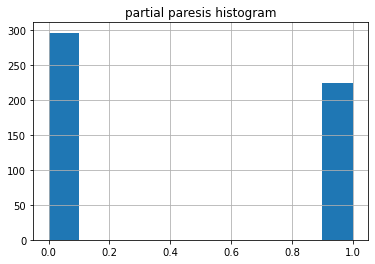

In [57]:
df['partial paresis'].hist().set_title('partial paresis histogram')

### How does Partial paresis influenciate the diabetes

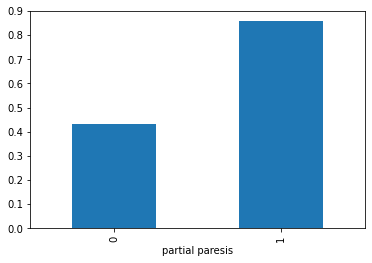

In [58]:
df.groupby('partial paresis')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the partial paresis influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

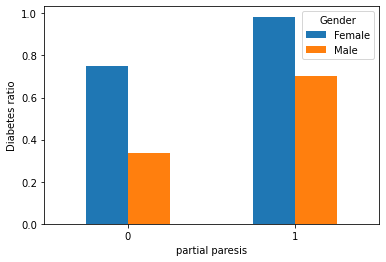

In [59]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='partial paresis', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Partial muscle stiffness

Text(0.5, 1.0, 'muscle stiffness histogram')

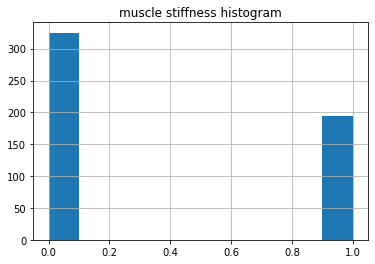

In [60]:
df['muscle stiffness'].hist().set_title('muscle stiffness histogram')

### How does muscle stiffness influenciate the diabetes

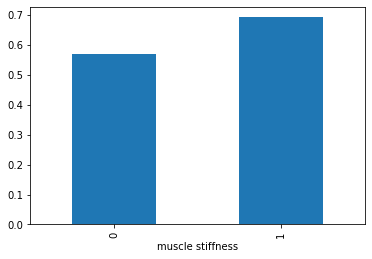

In [61]:
df.groupby('muscle stiffness')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the partial muscle stiffness influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

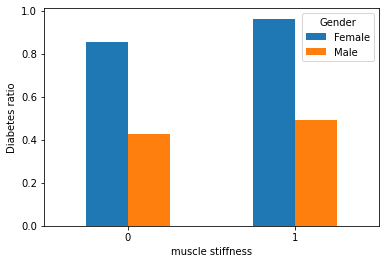

In [62]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='muscle stiffness', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Alopecia

Text(0.5, 1.0, 'Alopecia histogram')

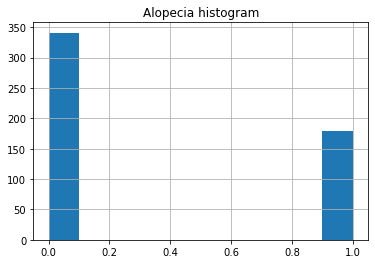

In [63]:
df['Alopecia'].hist().set_title('Alopecia histogram')

## How does Alopecia influenciate the diabetes

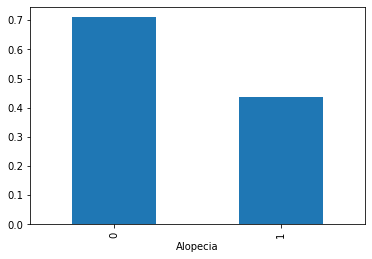

In [64]:
df.groupby('Alopecia')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Alopecia influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

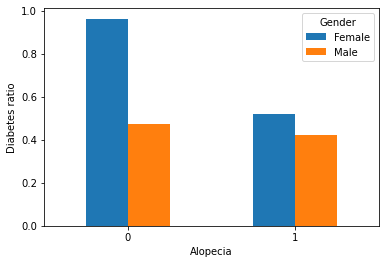

In [65]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Alopecia', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Obesity

Text(0.5, 1.0, 'Obesity histogram')

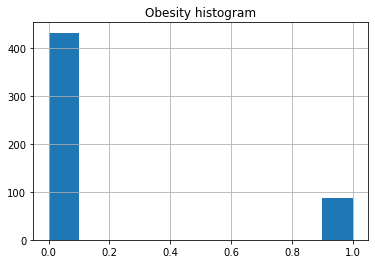

In [66]:
df['Obesity'].hist().set_title('Obesity histogram')

### How does Obesity influenciate the diabetes

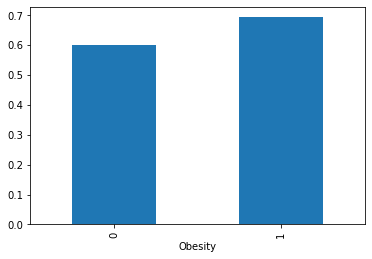

In [67]:
df.groupby('Obesity')['class'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

### How does the Obesity influenciate the diabetes rate in each gender

Text(0, 0.5, 'Diabetes ratio')

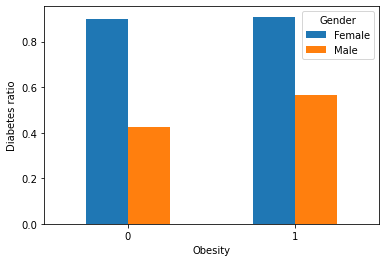

In [68]:
 fig, ax1 = plt.subplots()
df.pivot_table(index='Obesity', columns='Gender', 
               values='class', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Diabetes ratio')

# Missing values

In [69]:
columns_nan = df.isna().sum()
columns_nan

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Irritability          0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### we don't have any missing values

# Convertion of gender column

In [70]:
categorical_var = df[['Gender']]
categorical_dummies = pd.get_dummies(categorical_var, drop_first=True)

In [71]:
categorical_dummies.head()

Gender_Male
0            1
1            1
2            1
3            1
4            1

In [72]:
df.drop(['Gender'], axis=1, inplace= True)
df = pd.concat([df, categorical_dummies], axis=1)

In [73]:
df.head()

Age  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40         0           1                   0         1           0   
1   58         0           0                   0         1           0   
2   41         1           0                   0         1           1   
3   45         0           0                   1         1           1   
4   60         1           1                   1         1           1   

   Genital thrush  visual blurring  Irritability  partial paresis  \
0               0                0             0                0   
1               0                1             0                1   
2               0                0             0                0   
3               1                0             0                0   
4               0                1             1                1   

   muscle stiffness  Alopecia  Obesity  class  Gender_Male  
0                 1         1        1      1            1  
1                 0         1        0      1            1  
2                 1         1        0      1            1  
3                 0         0        0      1            1  
4                 1         1        1      1            1

# 2. Preparing data

In [74]:
X = df.drop('class',1).values
y = df['class'].values

# 3. Normalize

In [75]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# 4. Train and Test split

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (416, 14) (416,)
Test set: (104, 14) (104,)


# 5. Machine learning

### a) Decision Tree

##### Modeling

In [77]:
Decision_Tree_titanic = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [78]:
Decision_Tree_titanic.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

###### Prediction

In [79]:
Decision_Tree_predtitanic = Decision_Tree_titanic.predict(X_test)

In [80]:
Decision_Tree_predtitanic[0:5]

array([0, 0, 1, 1, 1])

##### Evaluation

In [81]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, Decision_Tree_predtitanic))

DecisionTrees's Accuracy:  0.9519230769230769


### b) Logistic Regression

##### Modeling

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_titanic = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

##### Prediction

In [83]:
Linear_Regression_predictiontitanic = LR_titanic.predict(X_test)
Linear_Regression_predictiontitanic[0:5]

array([0, 0, 1, 1, 1])

###### Evaluation

In [84]:
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, Linear_Regression_predictiontitanic))

Logistic Regresion's Accuracy:  0.8557692307692307


### c) Random Forest

##### Modeling

In [85]:
rf_titanic = RandomForestClassifier(criterion='gini', 
                        n_estimators=300,
                        max_depth=4,
                        min_samples_split=4,
                        min_samples_leaf=7,
                        max_features='auto',
                        oob_score=True,
                        random_state=1400,
                        n_jobs=-1)

rf_titanic.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=1400)

##### Prediction

In [86]:
Random_Forest_predictiontitanic = rf_titanic.predict(X_test)

##### Evaluation

In [87]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, Random_Forest_predictiontitanic))

Random Forest's Accuracy:  0.9038461538461539


### d) K-Nearest Neighbors

In [88]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_neigh=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_neigh)

    
    std_acc[n-1]=np.std(yhat_neigh==y_test)/np.sqrt(yhat_neigh.shape[0])

mean_acc

array([0.96153846, 0.96153846, 0.96153846, 0.93269231, 0.94230769,
       0.94230769, 0.94230769, 0.91346154, 0.92307692])

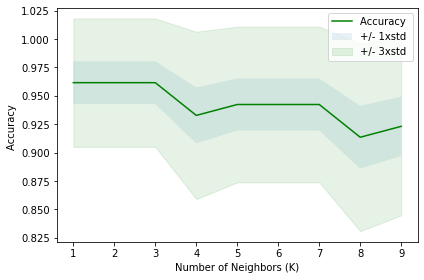

In [89]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [90]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9615384615384616 with k= 1
